In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df = pd.read_csv("computer_science_education_user_survey.csv")
df.head(2)

,Timestamp,Username,What is your background in Computer Science?,How confident are you with the basics of Computer Science fundamentals?,What platforms do you currently use to study Computer Science?,What features do you look for in a Computer Science course?,Have you ever purchased an online CS course?,How much would you be willing to spend on a premium monthly subscription for a Computer Science course?,What would you say is your learning style?,"In the courses you've taken, do you find illustrations, animations, and/or icons distracting or helpful to your understanding of the subject at hand?","When a course offers a quiz at the end of each lesson/course, do you feel this reinforces your understanding of the content?","Would you be comfortable staying in contact with illustratedJS, including being interviewed to help in our User Testing phase?"
0,2020/10/07 3:42:39 PM AST,barbaraloismoore@gmail.com,Bootcamp,3,Youtube;Leet Code,Videos in your CS language;Conceptual visual v...,No,Up to $20,Visual,Helpful,Yes,Yes
1,2020/10/07 3:44:56 PM AST,duellrdh@gmail.com,Bootcamp,3,Youtube;CodeCademy;Leet Code;CodeSignal;Lambda...,Videos in your CS language;Documented code;Vis...,Yes,Up to $35,Read & Write,Helpful,Yes,Yes


In [29]:
# New column names:'Timestamp', 'Username', 
#                  'Background_CS', 'Confidence_CS',
#                  'Platforms_CS', 'Features_CS', 
#                  'Purchased', 'Max_Amount',
#                  'Learning_Style', 'Visual _Materials',
#                  'Quiz_Importance', 'Cooperativness'.

df_new = df.rename(columns = {'What is your background in Computer Science?':'Background_CS',
                              'How confident are you with the basics of Computer Science fundamentals?':'Confidence_CS',
                              'What platforms do you currently use to study Computer Science?':'Platforms_CS',
                              'What features do you look for in a Computer Science course?':'Features_CS',
                              'Have you ever purchased an online CS course?':'Purchased',
                              'How much would you be willing to spend on a premium monthly subscription for a Computer Science course?':'Max_Amount',
                              'What would you say is your learning style?':'Learning_Style',
                              "In the courses you've taken, do you find illustrations, animations, and/or icons distracting or helpful to your understanding of the subject at hand?":'Visual _Materials',
                              'When a course offers a quiz at the end of each lesson/course, do you feel this reinforces your understanding of the content?':'Quiz_Importance',
                              'Would you be comfortable staying in contact with illustratedJS, including being interviewed to help in our User Testing phase?':'Cooperativness'})

print(df_new.shape)
df_new.head(3)


(134, 12)


,Timestamp,Username,Background_CS,Confidence_CS,Platforms_CS,Features_CS,Purchased,Max_Amount,Learning_Style,Visual _Materials,Quiz_Importance,Cooperativness
0,2020/10/07 3:42:39 PM AST,barbaraloismoore@gmail.com,Bootcamp,3,Youtube;Leet Code,Videos in your CS language;Conceptual visual v...,No,Up to $20,Visual,Helpful,Yes,Yes
1,2020/10/07 3:44:56 PM AST,duellrdh@gmail.com,Bootcamp,3,Youtube;CodeCademy;Leet Code;CodeSignal;Lambda...,Videos in your CS language;Documented code;Vis...,Yes,Up to $35,Read & Write,Helpful,Yes,Yes
2,2020/10/07 3:47:04 PM AST,christine.fletcher0101@gmail.com,Bootcamp,3,Youtube;Leet Code,Videos in your CS language;Conceptual visual v...,Yes,$0 - $10,Auditory,Helpful,Yes,Yes


In [30]:
df_new.dtypes

Timestamp            object
Username             object
Background_CS        object
Confidence_CS         int64
Platforms_CS         object
Features_CS          object
Purchased            object
Max_Amount           object
Learning_Style       object
Visual _Materials    object
Quiz_Importance      object
Cooperativness       object
dtype: object

In [31]:
df_new['Max_Amount'][0]

'Up to $20'

In [32]:
def get_int(cell_contents):
    try:
        return int(re.sub('\D', '', cell_contents))
    except:
        pass

In [33]:
df_new['Max_Amount'] = df_new['Max_Amount'].apply(get_int)

In [34]:
df_new.head(5)

,Timestamp,Username,Background_CS,Confidence_CS,Platforms_CS,Features_CS,Purchased,Max_Amount,Learning_Style,Visual _Materials,Quiz_Importance,Cooperativness
0,2020/10/07 3:42:39 PM AST,barbaraloismoore@gmail.com,Bootcamp,3,Youtube;Leet Code,Videos in your CS language;Conceptual visual v...,No,20.0,Visual,Helpful,Yes,Yes
1,2020/10/07 3:44:56 PM AST,duellrdh@gmail.com,Bootcamp,3,Youtube;CodeCademy;Leet Code;CodeSignal;Lambda...,Videos in your CS language;Documented code;Vis...,Yes,35.0,Read & Write,Helpful,Yes,Yes
2,2020/10/07 3:47:04 PM AST,christine.fletcher0101@gmail.com,Bootcamp,3,Youtube;Leet Code,Videos in your CS language;Conceptual visual v...,Yes,10.0,Auditory,Helpful,Yes,Yes
3,2020/10/07 3:47:50 PM AST,natalienetworks@gmail.com,Bootcamp,3,Udemy;Algo Expert;Leet Code;HackerRank,Conceptual visual videos;Documented code;Visua...,Yes,20.0,Kinesthetic,Helpful,No,Yes
4,2020/10/07 3:49:03 PM AST,joowoonk@gmail.com,Bootcamp,2,Youtube;Leet Code;Educative,Conceptual visual videos;Visualizations/animat...,Yes,20.0,Auditory,Helpful,Yes,No


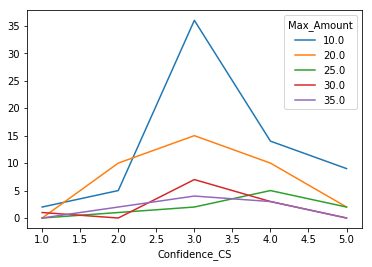

In [35]:
pd.crosstab(df_new['Confidence_CS'],df_new['Max_Amount']).plot();

In [36]:
df_new['Platforms_CS'][0]

'Youtube;Leet Code'

In [37]:
print(re.split(';', df_new['Platforms_CS'][0])) 

['Youtube', 'Leet Code']


In [38]:
def split_str(cell_contents):
    try:
#         re.split(', ;', cell_contents)
        return cell_contents.replace(', ', ';').split(';')
    except:
        pass

In [39]:
df_new['Platforms_CS'] = df_new['Platforms_CS'].apply(split_str)

In [40]:
df_new['Platforms_CS']

0                                   [Youtube, Leet Code]
1      [Youtube, CodeCademy, Leet Code, CodeSignal, L...
2                                   [Youtube, Leet Code]
3            [Udemy, Algo Expert, Leet Code, HackerRank]
4                        [Youtube, Leet Code, Educative]
                             ...                        
129                     [Youtube, Leet Code, HackerRank]
130                                            [Youtube]
131    [Youtube, Udemy, CodeCademy, Leet Code, Hacker...
132         [Youtube, Leet Code, HackerRank, CodeSignal]
133    [Leet Code, Lambda school, khan academy, cs50 ...
Name: Platforms_CS, Length: 134, dtype: object

In [41]:
# df_new['Platforms_CS'][0].split(';').split(', ')

In [44]:
cache = {}
for entry in df_new['Platforms_CS']:
    for i in entry:
        if i in cache:
            cache[i] += 1
        else:
            cache[i] = 1


print({k: v for k, v in sorted(cache.items(), key=lambda item: item[1])})
# for key, value in cache.items():
#     print(key, value)

{'CodeWars': 1, 'Real Python': 1, 'Exercism': 1, 'google': 1, 'Google News': 1, 'NPM': 1, 'GitHub': 1, 'Lambda TK': 1, "The tech's documentation": 1, 'geek for geeks': 1, 'MDN': 1, 'textbooks': 1, 'Medium': 1, 'Dev.to': 1, 'LinkedIn Learning': 1, 'I just google a lot ': 1, 'InterviewCake/practice': 1, 'Other various code challenge sites like project Euler': 1, 'and my own small projects': 1, 'Geekforgeeks': 1, 'Lambda School instructing': 1, 'TeamTreehouse': 1, 'Pluralsight': 1, 'I volunteer to write docs or edit materials for projects and become familiar in that manner': 1, 'Not really anything': 1, 'trying to brush up on Web core skills': 1, "I don't": 1, 'I just go to work': 1, 'Textbooks': 1, "Lambda's Training Kit": 1, 'Interview Cake': 1, 'Lambda CS Material': 1, 'free Intro to CS material from colleges': 1, 'Codility': 1, 'Lambda school': 1, 'khan academy': 1, 'cs50 at harvard': 1, 'cs61 at Berkeley ': 1, 'Books': 2, 'Coursera': 2, 'Lambda': 2, 'Lambda School': 7, 'Educative': 1

In [43]:
for key in cache.keys():
    k = key.split(', ')
    print(k)

['Youtube']
['Leet Code']
['CodeCademy']
['CodeSignal']
['Lambda School']
['Udemy']
['Algo Expert']
['HackerRank']
['Educative']
['FrontEnd Masters']
['CodeWars']
['Real Python']
['Books']
['Exercism']
['google']
['Google News']
['NPM']
['GitHub']
['Lambda TK']
["The tech's documentation"]
['geek for geeks']
['MDN']
['textbooks']
['Medium']
['Dev.to']
['LinkedIn Learning']
['I just google a lot ']
['InterviewCake/practice']
['Other various code challenge sites like project Euler']
['and my own small projects']
['Coursera']
['Lambda']
['Geekforgeeks']
['Lambda School instructing']
['TeamTreehouse']
['Pluralsight']
['I volunteer to write docs or edit materials for projects and become familiar in that manner']
['Not really anything']
['trying to brush up on Web core skills']
["I don't"]
['I just go to work']
['Textbooks']
["Lambda's Training Kit"]
['Interview Cake']
['Lambda CS Material']
['free Intro to CS material from colleges']
['Codility']
['Lambda school']
['khan academy']
['cs50 at

In [53]:
df_new.isnull().sum()

Timestamp            0
Username             0
Background_CS        0
Confidence_CS        0
Platforms_CS         0
Features_CS          0
Purchased            0
Max_Amount           1
Learning_Style       0
Visual _Materials    1
Quiz_Importance      2
Cooperativness       1
dtype: int64